In [17]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

#load data
df=pd.read_csv('sales_data.csv')
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df.head()

,Order ID,Product Name,Category,Price,Quantity,Total Amount,Timestamp,Payment Method,Customer ID,Region
0,1,Smartwatch,Accessories,499,1,499,2025-03-12 02:52:07,PayPal,C3549,North
1,2,Kettle,Apparel,301,5,1505,2025-03-21 07:35:07,Credit Card,C6560,West
2,3,T-shirt,Footwear,391,5,1955,2025-03-09 00:17:07,PayPal,C5616,West
3,4,Curtains,Sports,343,2,686,2025-03-20 11:08:07,Bank Transfer,C9667,South
4,5,Jacket,Electronics,88,3,264,2025-03-24 17:27:07,Bank Transfer,C4503,West


In [11]:
#cleaning data
df.isnull().sum()

Order ID          0
Product Name      0
Category          0
Price             0
Quantity          0
Total Amount      0
Timestamp         0
Payment Method    0
Customer ID       0
Region            0
dtype: int64

In [10]:
#find data types
df.dtypes

Order ID                   int64
Product Name              object
Category                  object
Price                      int64
Quantity                   int64
Total Amount               int64
Timestamp         datetime64[ns]
Payment Method            object
Customer ID               object
Region                    object
dtype: object

In [14]:
#total sales
total_sales=df['Total Amount'].sum()
print(f'Total Sales: {total_sales}')
#order count
total_order=len(df)
print(f'Total Order: {total_order}')

Total Sales: 378267
Total Order: 500


In [24]:
#sales by category
category_sales=df.groupby('Category')['Total Amount'].sum().reset_index()
print(category_sales)

      Category  Total Amount
0  Accessories         60092
1      Apparel         64744
2  Electronics         60510
3     Footwear         52697
4      Kitchen         76556
5       Sports         63668


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8992\3235278027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total Amount', data=category_sales, palette="viridis")


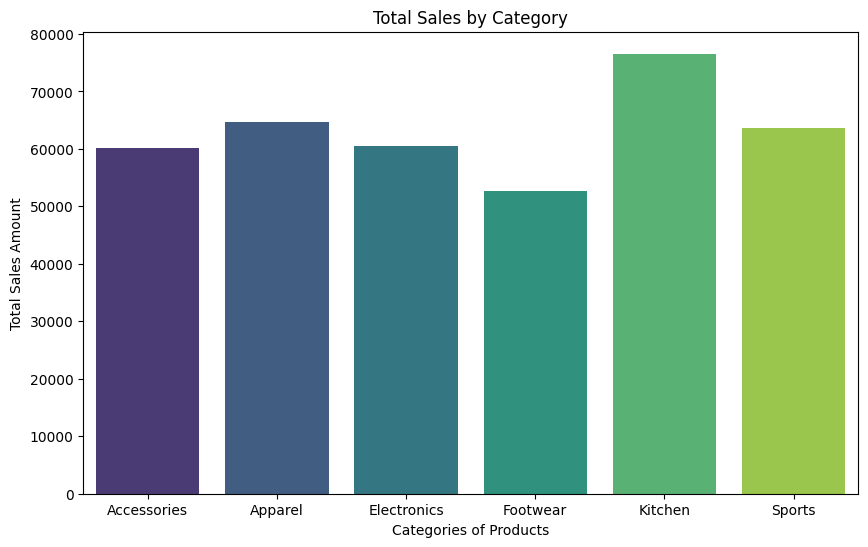

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Amount', data=category_sales, palette="viridis")
plt.title('Total Sales by Category')
plt.xlabel('Categories of Products')
plt.ylabel('Total Sales Amount')
plt.show()

In [35]:
#top sales products
top_products=df.groupby('Product Name')['Total Amount'].sum().reset_index()
top_products_sorted=top_products.sort_values('Total Amount', ascending=False).head().reset_index(drop=True)
top_products_sorted

,Product Name,Total Amount
0,Boots,17540
1,Wireless Charger,13975
2,Sandals,12218
3,Fridge,11929
4,Tablet,11820


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8992\3419301619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Amount', y='Product Name', data=top_products_sorted, palette="Greens")


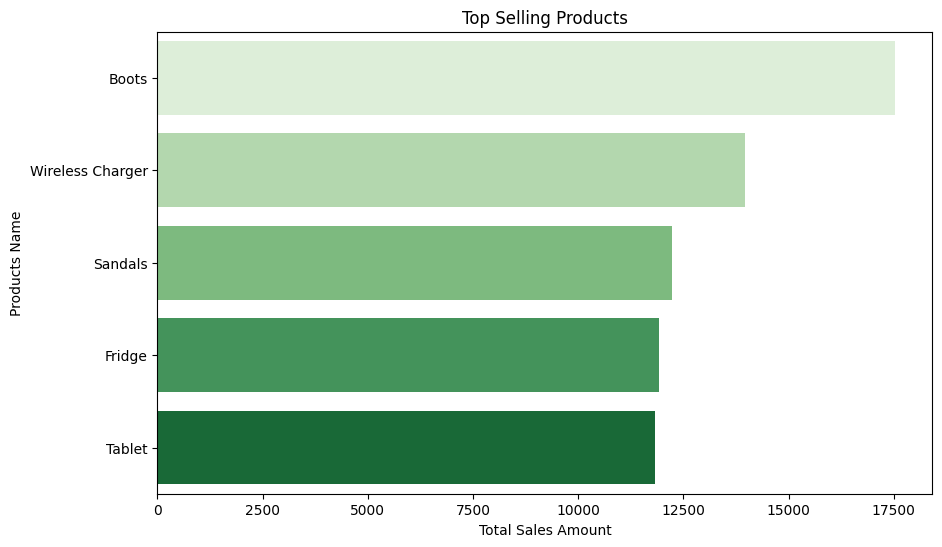

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Amount', y='Product Name', data=top_products_sorted, palette="Greens")
plt.title('Top Selling Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Products Name')
plt.show()

In [41]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().reset_index()
top_customers_sorted = top_customers.sort_values('Total Amount', ascending=False).head(5)
top_customers_sorted

,Customer ID,Total Amount
102,C3059,3266
389,C8055,3075
297,C6657,2480
236,C5549,2475
380,C7846,2455


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8992\3066815942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Amount', y='Region', data=regional_sales, palette="magma")


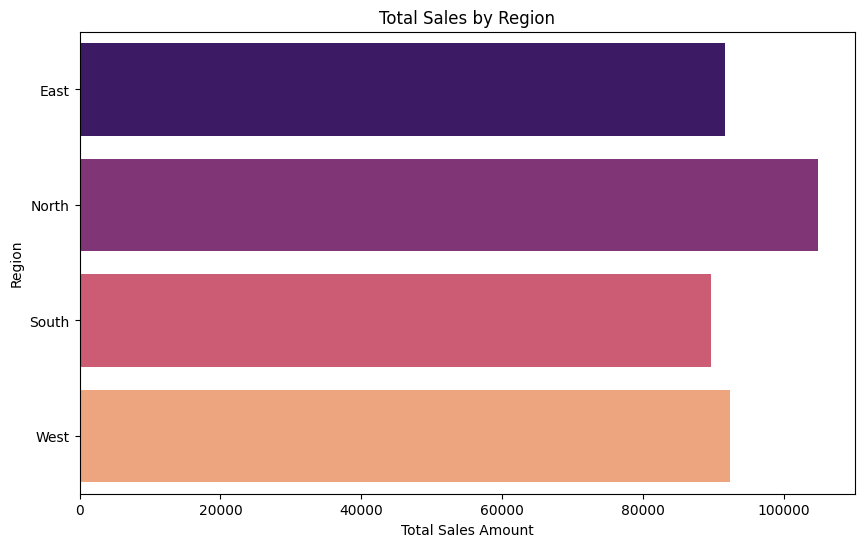

In [47]:
regional_sales = df.groupby('Region')['Total Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Amount', y='Region', data=regional_sales, palette="magma")
plt.title('Total Sales by Region')
plt.xlabel('Total Sales Amount')
plt.ylabel('Region')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8992\3717849139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Amount', y='Customer ID', data=top_customers_sorted, palette="plasma")


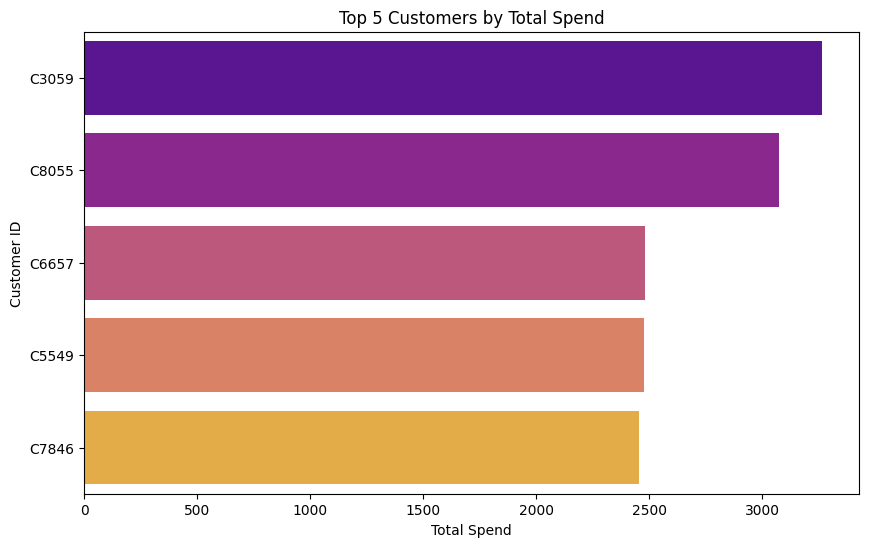

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Amount', y='Customer ID', data=top_customers_sorted, palette="plasma")
plt.title('Top 5 Customers by Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Customer ID')
plt.show()

In [53]:
print("\nKey Insights:")

# 1. Top 3 high-performing product categories
print("\nTop 3 High-Performing Product Categories by Sales:")
print(category_sales[['Category', 'Total Amount']])

# 2. Top 5 customers by total spend
print("\nTop 5 Customers by Total Spend:")
print(top_customers_sorted[['Customer ID', 'Total Amount']])

# 3. Regional Sales Insights
print("\nTotal Sales by Region:")
print(regional_sales)

# Optional: Calculate some more metrics like sales growth or percentages if needed
total_sales = df['Total Amount'].sum()
total_sales_by_region = regional_sales['Total Amount'].sum()

print(f"\nTotal Sales: {total_sales}")
print(f"Total Sales by Region: {total_sales_by_region}")

# Optional: You can also calculate percentage contribution of top categories to the overall sales
category_sales['Sales Percentage'] = (category_sales['Total Amount'] / total_sales) * 100
print("\nSales Percentage of Top Categories:")
print(category_sales[['Category', 'Sales Percentage']])


Key Insights:

Top 3 High-Performing Product Categories by Sales:
      Category  Total Amount
0  Accessories         60092
1      Apparel         64744
2  Electronics         60510
3     Footwear         52697
4      Kitchen         76556
5       Sports         63668

Top 5 Customers by Total Spend:
    Customer ID  Total Amount
102       C3059          3266
389       C8055          3075
297       C6657          2480
236       C5549          2475
380       C7846          2455

Total Sales by Region:
  Region  Total Amount
0   East         91612
1  North        104738
2  South         89659
3   West         92258

Total Sales: 378267
Total Sales by Region: 378267

Sales Percentage of Top Categories:
      Category  Sales Percentage
0  Accessories         15.886133
1      Apparel         17.115952
2  Electronics         15.996637
3     Footwear         13.931165
4      Kitchen         20.238615
5       Sports         16.831497
